In [1]:
import tensorflow 
import numpy 
import scipy
import tensorflow as tf
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.python.keras.datasets import mnist 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import os
numpy.random.seed(42)

(train_pic_data, train_answers), (test_pic_data, test_answers) = mnist.load_data()
ir, ic = 28, 28 
input_shape = (ir, ic, 1)
train_pic_data = train_pic_data.reshape(train_pic_data.shape[0], ir, ic, 1) 
test_pic_data = test_pic_data.reshape(test_pic_data.shape[0], ir, ic, 1)
# convert from int to float
train_pic_data = train_pic_data.astype('float32')
test_pic_data = test_pic_data.astype('float32')
train_pic_data /= 255
test_pic_data /= 255
train_pic_answers = tf.keras.utils.to_categorical(train_answers, 10) #преобразуем в метки наши ответы
test_pic_answers = tf.keras.utils.to_categorical(test_answers, 10)
model = Sequential()
model.add(Conv2D(75, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

print(model.summary())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 75)        1950      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 75)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 100)         187600    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [2]:
history=model.fit(train_pic_data, train_pic_answers, validation_data=(test_pic_data, test_pic_answers), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 205s - loss: 0.2164 - acc: 0.9332 - val_loss: 0.0432 - val_acc: 0.9869
Epoch 2/10
 - 203s - loss: 0.0593 - acc: 0.9819 - val_loss: 0.0371 - val_acc: 0.9880
Epoch 3/10
 - 205s - loss: 0.0421 - acc: 0.9866 - val_loss: 0.0230 - val_acc: 0.9918
Epoch 4/10
 - 204s - loss: 0.0326 - acc: 0.9895 - val_loss: 0.0188 - val_acc: 0.9940
Epoch 5/10
 - 203s - loss: 0.0277 - acc: 0.9914 - val_loss: 0.0245 - val_acc: 0.9919
Epoch 6/10
 - 203s - loss: 0.0235 - acc: 0.9923 - val_loss: 0.0165 - val_acc: 0.9943
Epoch 7/10
 - 203s - loss: 0.0205 - acc: 0.9937 - val_loss: 0.0187 - val_acc: 0.9936
Epoch 8/10
 - 202s - loss: 0.0178 - acc: 0.9944 - val_loss: 0.0172 - val_acc: 0.9938
Epoch 9/10
 - 203s - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0187 - val_acc: 0.9934
Epoch 10/10
 - 203s - loss: 0.0158 - acc: 0.9945 - val_loss: 0.0225 - val_acc: 0.9937


In [3]:
scores = model.evaluate(test_pic_data, test_pic_answers, verbose=0)
print("CNN accuracy: %.2f%%" % (scores[1]*100))

CNN accuracy: 99.37%


In [4]:
save_json = model.to_json()
file_json = open("model_CNN5.json", "w")
file_json.write(save_json)
file_json.close()
tf.keras.models.save_model(model,"model_CNN5.h5")

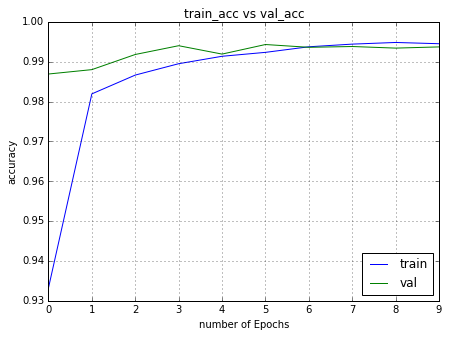

In [6]:
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import History

train_acc=history.history['acc']
val_acc=history.history['val_acc']
xc=range(10)

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('number of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [7]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
Y_pred = model.predict(test_pic_data)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

target_names = ['0', '1', '2','3','4','5','6','7','8','9']
print(classification_report(np.argmax(test_pic_answers,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(test_pic_answers,axis=1), y_pred))

[[3.7718720e-10 7.9664105e-08 6.6813961e-08 ... 9.9999893e-01
  5.9405447e-10 9.4501621e-07]
 [9.3733346e-12 1.6150155e-09 1.0000000e+00 ... 7.6015434e-14
  4.0186593e-13 1.0560766e-13]
 [4.0382172e-08 9.9999821e-01 5.4078768e-08 ... 4.6497178e-07
  3.1627744e-07 2.8574469e-08]
 ...
 [1.6202749e-18 6.0092287e-12 2.4572904e-15 ... 5.7769550e-13
  1.8855081e-11 2.8214438e-11]
 [2.1669638e-11 6.8168587e-16 2.4095758e-17 ... 1.5749322e-15
  2.1065551e-08 5.4555319e-12]
 [5.0202048e-10 4.7550994e-11 9.1405589e-10 ... 3.9353765e-15
  1.3918958e-09 3.2447219e-13]]
[7 2 1 ... 4 5 6]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       980
          1       0.99      1.00      0.99      1135
          2       0.99      1.00      0.99      1032
          3       1.00      0.99      1.00      1010
          4       1.00      1.00      1.00       982
          5       1.00      0.99      0.99       892
          6       1.00      0.99      0.99    